# Mall Customers

## Machine learning: Hierarchical Clustering on the Mall Customers dataset

In [191]:
#Importar librerías 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [192]:
#Cargar datos
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Cmt: Visualización general de las primeras 5 filas encontradas en la base de datos

In [193]:
dataset.shape

(200, 5)

Cmt: Se tiene un total de 200 filas y 5 columnas

In [194]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Cmt: Tabla de estadísticos descriptivos

In [195]:
dataset.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Cmt: No se encontraron valores nulos 

In [196]:
dataset.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Cmt: No se presentan cambios

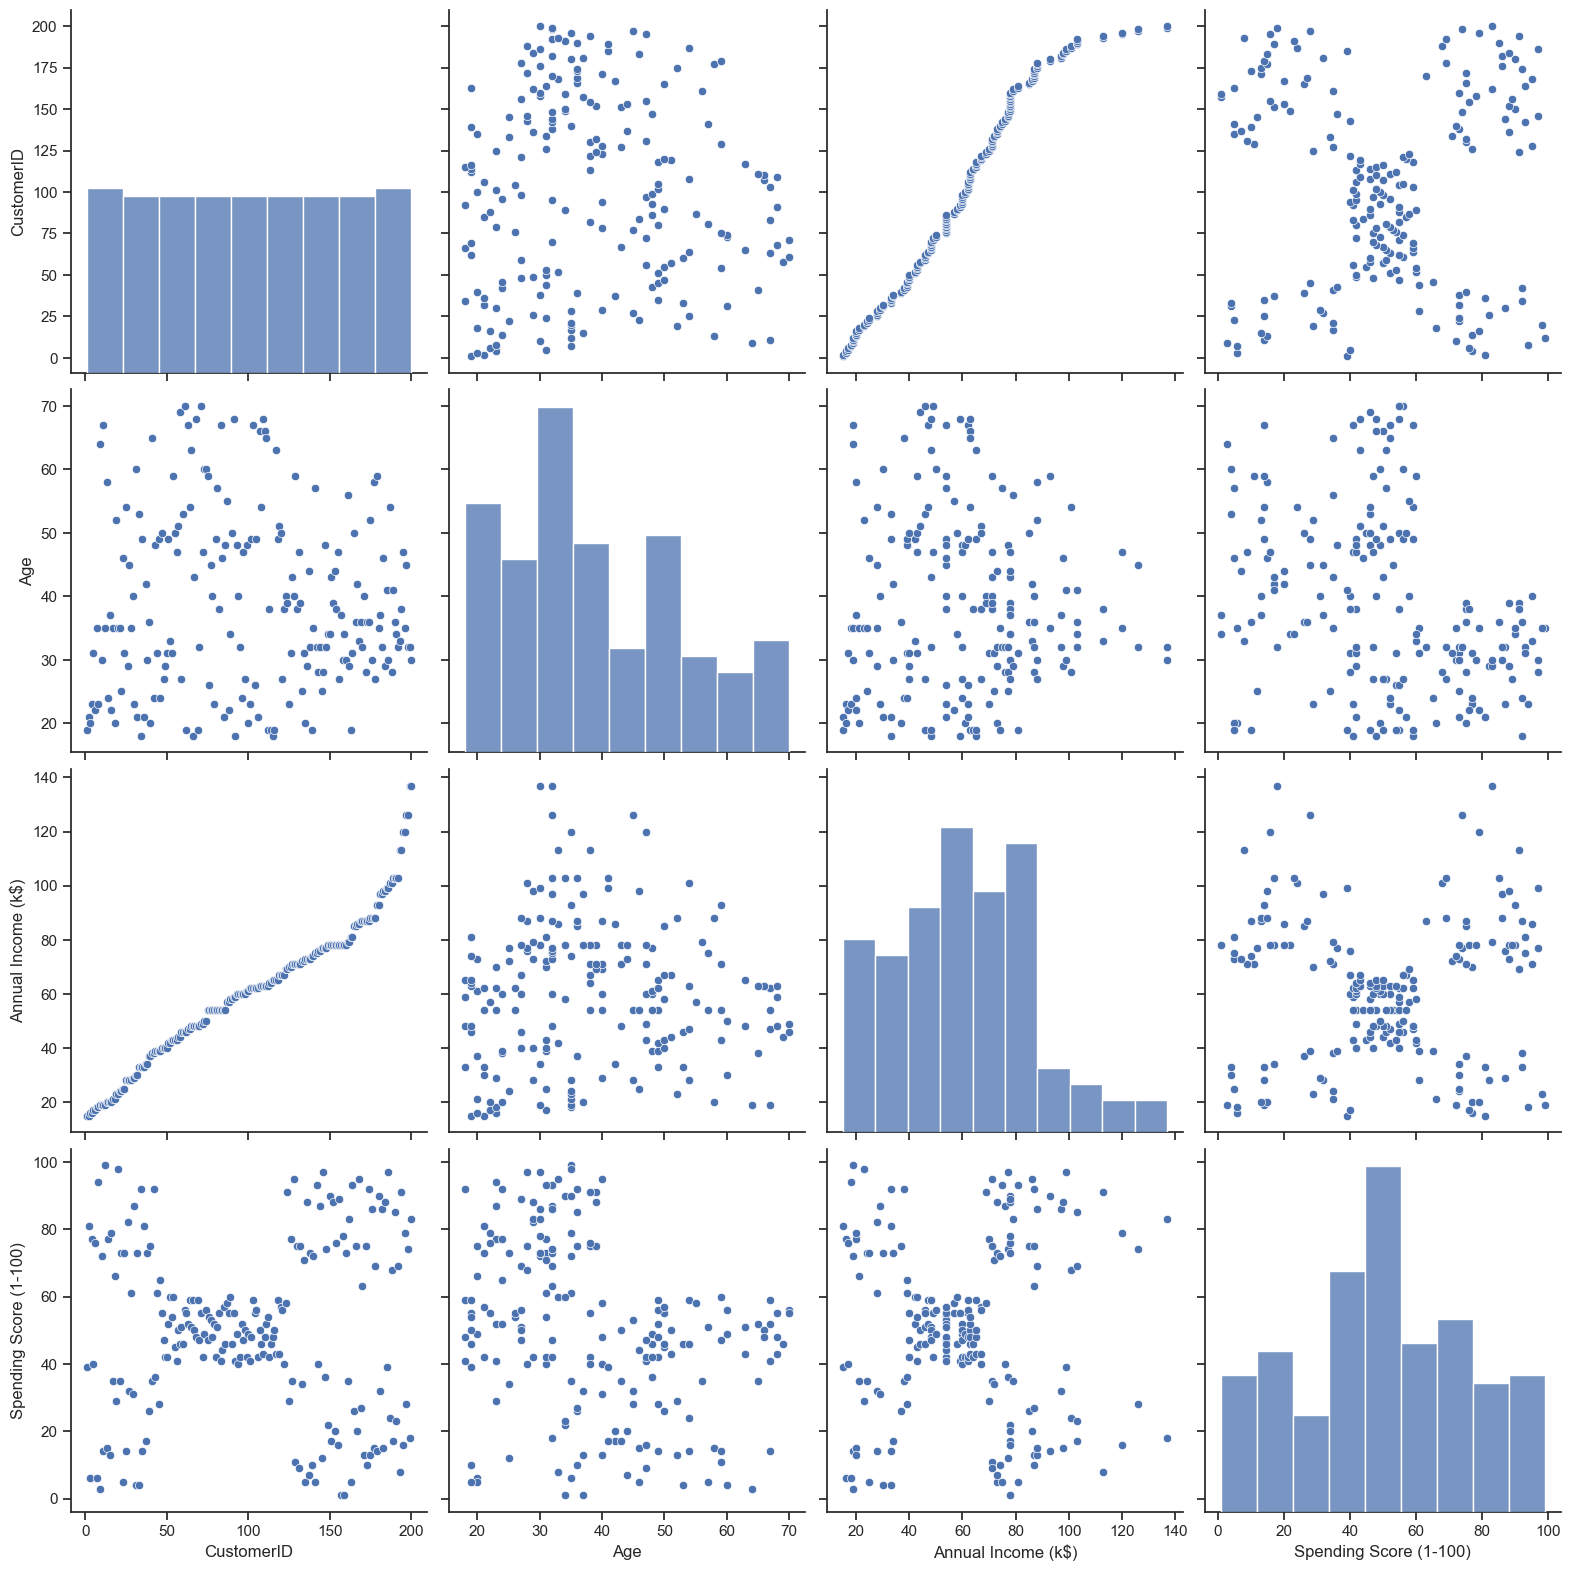

In [197]:
sns.pairplot(dataset.dropna(),size=4,kind='scatter')

Cmt: Correlación entre variables (grafica)

In [198]:
dataOnlyFour = dataset.drop(['Gender'],axis=1)

Cmt: Se excluye la columna que contiene valores cualitativos (no cuantitativos)

In [199]:
# Matriz de correlación
corr_matrix = dataOnlyFour.corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


Cmt: Correlación entre variables (numérica)

En terminos generales existe una baja correlación entre las variables, exceptuando Annual Income - CustomerID

<Axes: >

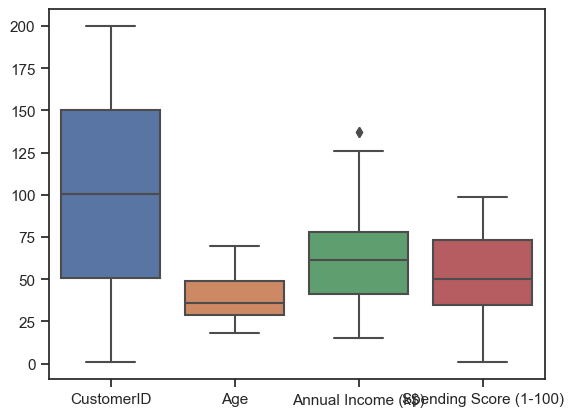

In [200]:
# Diagramas de caja para cada variable
sns.set_theme(style="ticks", palette="deep")
sns.boxplot(dataset)

Cmt: Distribución de datos en cuartiles, permite observar el promedio y localizar valores atipicos
     (Se encontraron valores atipicos en los ingresos anuales, a pesar de ello, ya que no se encuentran lejos del promedio
     seran tomados en cuenta)

In [201]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(dataOnlyFour), columns = dataOnlyFour.columns)
X

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


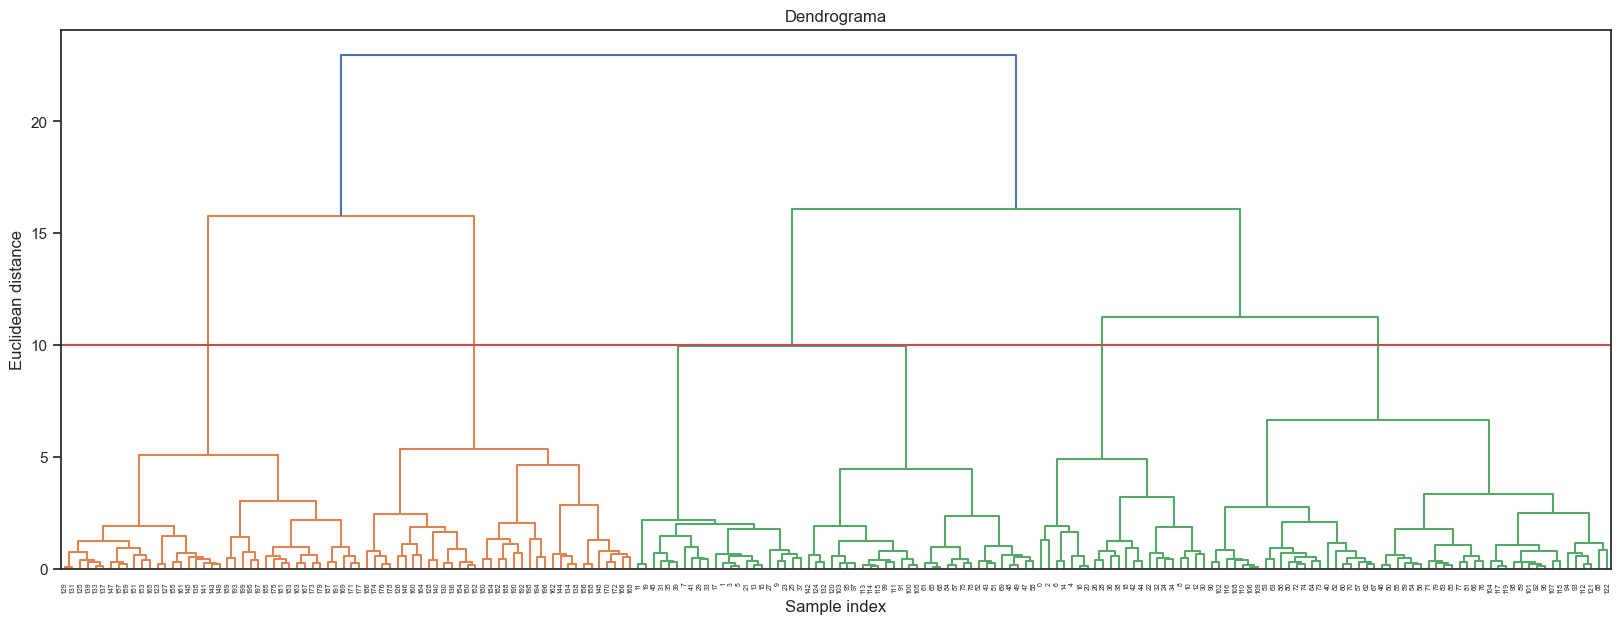

In [202]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

Cmt: Acorde con el dendograma, observamos una partición en 6 grupos para una distancia de 10
(a medida que se reduce el criterio de disimilitud los clusters se fucionan de manera secuencial con el par de clases mas cercano, esto hasta finalmente llegar a englobar todos los datos)
> El dendograma tiene por objetivo representar la jerarquía de categorias segun el grado de similitud y caracteristicas compartidas (identifica que clases son estadisticamente mas cercanas), muestra las distancias de atributos entre cada par de clases fusionadas de manera secuencial

In [203]:
hier_clustering = AgglomerativeClustering(n_clusters=6)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 0, 5, 4, 2,
       4, 5, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

Cmt: tenemos un total de 200 observaciones categorizadas segun el cluster al que pertenecen 

In [204]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','wheat','cyan','brown','lavender','pink']
asignar=[]
for row in labels:
    asignar.append(colores[row])

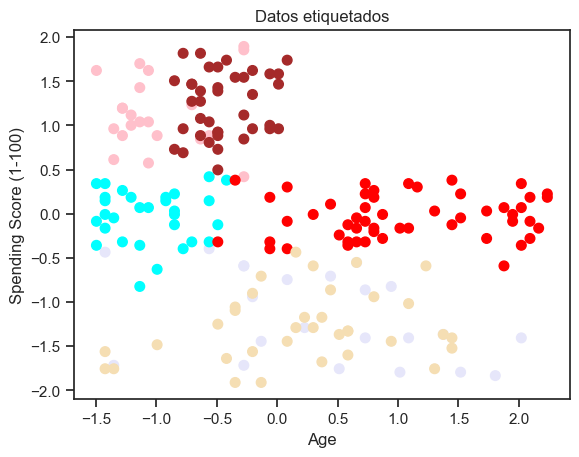

In [205]:
f1 = X['Age'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=48)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

Cmt: la grafica muestra la distribución de los clusters (cada grupo tiene asignado un color distinto) en torno a dos variables (datos previamente estandarizados)

In [206]:
def plot_dendrogram(model, **kwargs):
    from scipy.cluster.hierarchy import dendrogram 
    import numpy as np 
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts [i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances,
counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index') 
    plt.ylabel('Euclidean distance')
    plt.show()


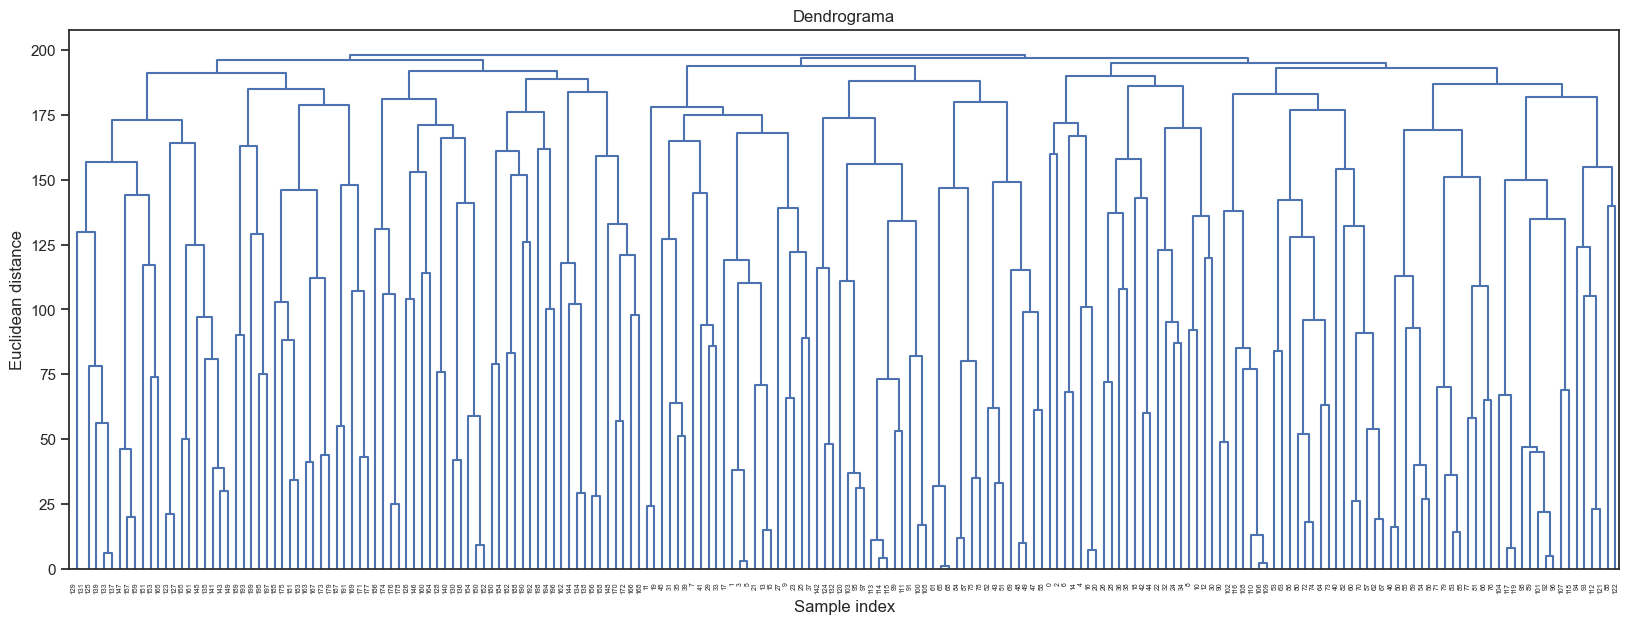

In [207]:
plot_dendrogram(hier_clustering, color_threshold=0)

Cmt: Visualización del dendrograma a mayor detalle 

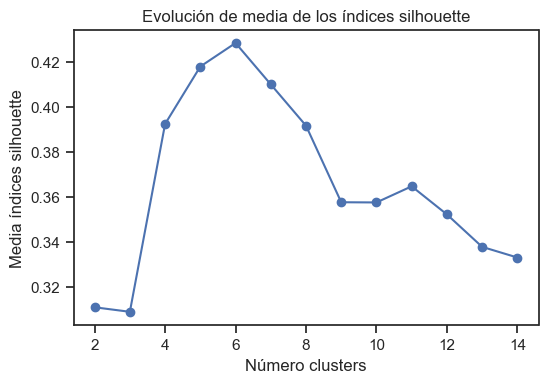

In [208]:
# Método silhouette para identificar el número óptimo de clusters
# ===============================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
        affinity = 'euclidean',
        linkage = 'ward',
        n_clusters = n_clusters
        )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append (silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel ('Número clusters')
ax.set_ylabel('Media índices silhouette');

Cmt: Un valor alto cercano a 1, indica buena cohesión y separación, por lo tanto el número optimo de clusters es de 6 acorde con la grafica

In [209]:
# Calcular medidas de calidad para Clustering Jerárquico 
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.42832993481997816
Índice de Calinski-Harabasz: 143.6561433644843
Davies-Bouldin Index: 0.787609522022419


In [210]:
# Calcular el coeficiente de correlación cofenética 
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.644982688580315, array([16.06037879,  1.28415501, 16.06037879, ..., 15.79117249,
        0.74388365, 15.79117249]))


Cmt: Los valores que oscilan entre 0.6 y 0.95 indican una buena correspondencia entre la matriz original y su representación a través de un dendrograma